## Detect and Mask

In [1]:
!conda env list

# conda environments:
#
base                     /home/jimmy31024/anaconda3
articover             *  /home/jimmy31024/anaconda3/envs/articover
articoverclone1          /home/jimmy31024/anaconda3/envs/articoverclone1
detextify                /home/jimmy31024/anaconda3/envs/detextify
detextifying             /home/jimmy31024/anaconda3/envs/detextifying
diffste                  /home/jimmy31024/anaconda3/envs/diffste
lora                     /home/jimmy31024/anaconda3/envs/lora



In [2]:
from articover.text_detector import Keras_OCR
from articover import tools

2023-08-10 17:31:49.174918: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 17:31:50.949742: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def detect_annotate(in_image_path):
    detector = Keras_OCR()
    text_boxes = detector.detect_text(in_image_path)
    image = in_image_path
    if not isinstance(image, np.ndarray):
        image = tools.read(image)
    if not text_boxes:
        pass
    else:
        annot_image =tools.drawAnnotations(image, text_boxes)
        return text_boxes, annot_image

In [4]:
import numpy as np

Looking for /home/jimmy31024/.keras-ocr/craft_mlt_25k.h5


2023-08-10 17:32:12.958848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-10 17:32:13.406050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-10 17:32:13.406360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1/1 [==============================] - 10s 10s/step


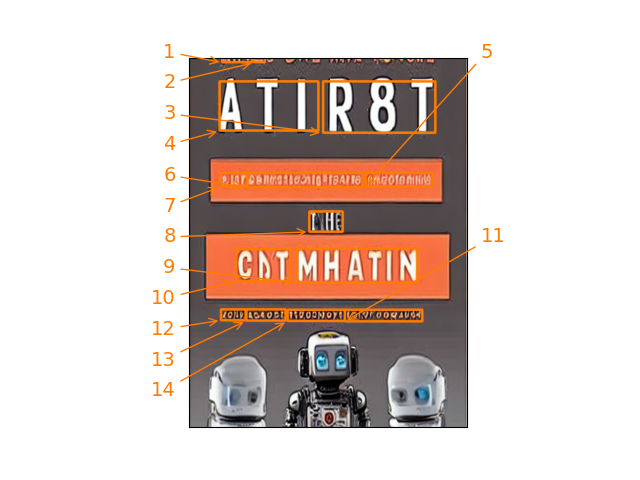

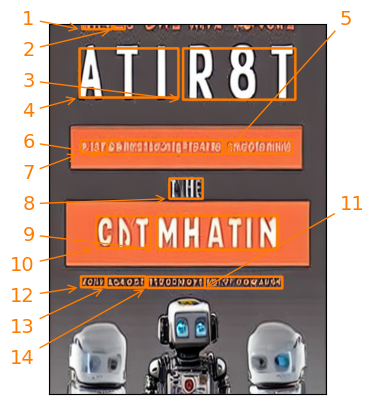

In [5]:
text_boxes, annot_image =detect_annotate('/home/jimmy31024/articover/images/inputs/sample12.png')

## Mask

In [14]:
from PIL import Image
from articover.masking import MaskGenerator

In [15]:
def mask(text_boxes, in_image_path, text_box_num: list) -> Image.Image:
    #mask
    masker = MaskGenerator()
    inpainting_mask, selected_masks=masker.generate_mask(text_boxes, in_image_path, text_box_num)
    return inpainting_mask, selected_masks

In [16]:
text_box_num = [3, 4, 8, 9, 10]

In [17]:
inpainting_mask, selected_masks = mask(text_boxes, '/home/jimmy31024/articover/images/inputs/sample12.png', text_box_num)

In [18]:
import os 
os.chdir('/home/jimmy31024/articover/images/masks')
os.mkdir('mask2')
os.chdir('mask2')
inpainting_mask.save('inpaint.png')
for selected_mask, i in zip(selected_masks, text_box_num):
    selected_mask.save(f'selected_mask{i}.png')